In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
from scipy.misc import derivative
import time

In [21]:
data= pd.read_csv("ENSO_Data.txt",names=['y','x'], sep=" ")

data

,y,x
NaN,12.9,1.0
NaN,11.3,2.0
NaN,10.6,3.0
NaN,11.2,4.0
NaN,10.9,5.0
...,...,...
NaN,12.8,164.0
NaN,13.2,165.0
NaN,14.0,166.0
NaN,13.4,167.0


In [22]:
y = torch.from_numpy(data['y'].to_numpy(np.float64))
x = torch.from_numpy(data['x'].to_numpy(np.float64))

# b = torch.tensor([11.0,3.0,0.5,40.0,-0.7,-1.3,25.0,-0.3,1.4],requires_grad=True)
b = torch.tensor([10.0,3.0,0.5,44.0,-1.5,0.5,26.0,-0.1,1.5],requires_grad=True)

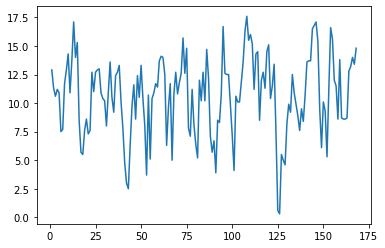

In [23]:
plt.plot(x.numpy(),y.numpy())

In [24]:
## Numerical Differentiation

b = np.array([11.0,3.0,0.5,40.0,-0.7,-1.3,25.0,-0.3,1.4]).reshape(-1,1)
# b = np.array([10.0,3.0,0.5,44.0,-1.5,0.5,26.0,-0.1,1.5]).reshape(-1,1)

x=x.detach().numpy()

u=0.1 #beta multiply identity matrix
beta = 10
V_prev = 0


def f0(b0):
    return  b0 + b[1]*np.cos( 2*np.pi*x/12 ) + b[2]*np.sin( 2*np.pi*x/12 ) + b[4]*np.cos( 2*np.pi*x/b[3] ) + b[5]*np.sin( 2*np.pi*x/b[3] ) + b[7]*np.cos( 2*np.pi*x/b[6] ) + b[8]*np.sin( 2*np.pi*x/b[6] )-y.detach().numpy()  
def f1(b1):
    return b[0] + b1*np.cos( 2*np.pi*x/12 ) + b[2]*np.sin( 2*np.pi*x/12 ) + b[4]*np.cos( 2*np.pi*x/b[3] ) + b[5]*np.sin( 2*np.pi*x/b[3] ) + b[7]*np.cos( 2*np.pi*x/b[6] ) + b[8]*np.sin( 2*np.pi*x/b[6] )-y.detach().numpy()   
def f2(b2):
    return b[0] + b[1]*np.cos( 2*np.pi*x/12 ) + b2*np.sin( 2*np.pi*x/12 ) + b[4]*np.cos( 2*np.pi*x/b[3] ) + b[5]*np.sin( 2*np.pi*x/b[3] ) + b[7]*np.cos( 2*np.pi*x/b[6] ) + b[8]*np.sin( 2*np.pi*x/b[6] )-y.detach().numpy()  
def f3(b3):
    return b[0] + b[1]*np.cos( 2*np.pi*x/12 ) + b[2]*np.sin( 2*np.pi*x/12 ) + b[4]*np.cos( 2*np.pi*x/b3 ) + b[5]*np.sin( 2*np.pi*x/b3 ) + b[7]*np.cos( 2*np.pi*x/b[6] ) + b[8]*np.sin( 2*np.pi*x/b[6] )-y.detach().numpy()  
def f4(b4):
    return b[0] + b[1]*np.cos( 2*np.pi*x/12 ) + b[2]*np.sin( 2*np.pi*x/12 ) + b4*np.cos( 2*np.pi*x/b[3] ) + b[5]*np.sin( 2*np.pi*x/b[3] ) + b[7]*np.cos( 2*np.pi*x/b[6] ) + b[8]*np.sin( 2*np.pi*x/b[6] )-y.detach().numpy()   
def f5(b5):
    return b[0] + b[1]*np.cos( 2*np.pi*x/12 ) + b[2]*np.sin( 2*np.pi*x/12 ) + b[4]*np.cos( 2*np.pi*x/b[3] ) + b5*np.sin( 2*np.pi*x/b[3] ) + b[7]*np.cos( 2*np.pi*x/b[6] ) + b[8]*np.sin( 2*np.pi*x/b[6] )-y.detach().numpy()    
def f6(b6):
    return b[0] + b[1]*np.cos( 2*np.pi*x/12 ) + b[2]*np.sin( 2*np.pi*x/12 ) + b[4]*np.cos( 2*np.pi*x/b[3] ) + b[5]*np.sin( 2*np.pi*x/b[3] ) + b[7]*np.cos( 2*np.pi*x/b6 ) + b[8]*np.sin( 2*np.pi*x/b6 )-y.detach().numpy()  
def f7(b7):
    return b[0] + b[1]*np.cos( 2*np.pi*x/12 ) + b[2]*np.sin( 2*np.pi*x/12 ) + b[4]*np.cos( 2*np.pi*x/b[3] ) + b[5]*np.sin( 2*np.pi*x/b[3] ) + b7*np.cos( 2*np.pi*x/b[6] ) + b[8]*np.sin( 2*np.pi*x/b[6] )-y.detach().numpy()   
def f8(b8):
    return b[0] + b[1]*np.cos( 2*np.pi*x/12 ) + b[2]*np.sin( 2*np.pi*x/12 ) + b[4]*np.cos( 2*np.pi*x/b[3] ) + b[5]*np.sin( 2*np.pi*x/b[3] ) + b[7]*np.cos( 2*np.pi*x/b[6] ) + b8*np.sin( 2*np.pi*x/b[6] )-y.detach().numpy()   

start_time = time.perf_counter()   
    
for c in range(500):

    y_pred = b[0] + b[1]*np.cos( 2*np.pi*x/12 ) + b[2]*np.sin( 2*np.pi*x/12 ) + b[4]*np.cos( 2*np.pi*x/b[3] ) + b[5]*np.sin( 2*np.pi*x/b[3] ) + b[7]*np.cos( 2*np.pi*x/b[6] ) + b[8]*np.sin( 2*np.pi*x/b[6] )-y.detach().numpy()  
    error = (y_pred - y.detach().numpy()).reshape(-1,1)
    
    d_b0 = derivative(f0,b[0] , dx=1e-6)
    d_b1 = derivative(f1,b[1] , dx=1e-6)
    d_b2 = derivative(f2,b[2] , dx=1e-6)
    d_b3 = derivative(f3,b[3] , dx=1e-6)
    d_b4 = derivative(f4,b[4] , dx=1e-6)
    d_b5 = derivative(f5,b[5] , dx=1e-6)
    d_b6 = derivative(f6,b[6] , dx=1e-6)
    d_b7 = derivative(f7,b[7] , dx=1e-6)
    d_b8 = derivative(f8,b[8] , dx=1e-6)
     
    jacobian = np.transpose(np.array([d_b0,d_b1,d_b2,d_b3,d_b4,d_b5,d_b6,d_b7,d_b8]))
    dParam = np.matmul(np.matmul(np.linalg.inv((np.matmul(np.transpose(jacobian),jacobian)+u*np.identity(len(b)))),np.transpose(jacobian)),error)
    b -= dParam
    V = np.sum(np.square(error))
    if(V > V_prev):
            u *= beta
    else:
            u /= beta
    V_prev = V
    print("c: ",c," error: ",V," B:", b)
    
    if V < 7.88539786689E+02:
        break
print("time taken to execute: ",time.perf_counter()-start_time)  

c:  0  error:  22925.296985372326  B: [[21.18208667]
 [ 6.16743823]
 [ 0.9517521 ]
 [43.39094783]
 [-2.18555971]
 [-2.14273191]
 [27.03843755]
 [ 0.61046009]
 [ 0.6005788 ]]
c:  1  error:  4111.629077085048  B: [[21.12476502]
 [ 6.15203741]
 [ 1.00496328]
 [42.26177743]
 [-2.65078478]
 [-0.69740281]
 [26.63840793]
 [ 0.63452676]
 [ 2.98842231]]
c:  2  error:  3315.1225011337956  B: [[21.04465326]
 [ 6.14451293]
 [ 1.06865381]
 [44.4610443 ]
 [-3.45824453]
 [ 0.50196811]
 [27.07818468]
 [ 0.77272948]
 [ 2.83195472]]
c:  3  error:  3208.91601123665  B: [[21.03457329]
 [ 6.15699368]
 [ 1.06495721]
 [43.78036806]
 [-3.29407573]
 [ 0.58681803]
 [26.68307819]
 [ 0.07833811]
 [ 3.09503466]]
c:  4  error:  3167.515997154792  B: [[21.0266202 ]
 [ 6.14816275]
 [ 1.0657703 ]
 [44.35927887]
 [-3.26983823]
 [ 0.99896768]
 [27.00217986]
 [ 0.64663255]
 [ 2.99045231]]
c:  5  error:  3157.7622418760593  B: [[21.02177749]
 [ 6.15434048]
 [ 1.06792168]
 [44.19519813]
 [-3.27844343]
 [ 0.96376334]
 [26.8

c:  85  error:  3154.1591467316475  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108988]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  86  error:  3154.159146731647  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464576]
 [ 2.99337408]]
c:  87  error:  3154.1591467316475  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464578]
 [ 2.99337408]]
c:  88  error:  3154.1591467316475  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.31108869]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  89  error:  3154.1591467316466  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  90  error:  3154.1591467316475  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560277]
 [44.3110887 ]
 [-3.24628572]
 [ 1.0510898

c:  171  error:  3154.159146731647  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  172  error:  3154.1591467316475  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  173  error:  3154.1591467316475  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560277]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  174  error:  3154.1591467316475  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  175  error:  3154.1591467316466  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  176  error:  3154.1591467316466  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.0

c:  252  error:  3154.1591467316475  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  253  error:  3154.1591467316466  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560277]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108988]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  254  error:  3154.159146731646  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560277]
 [44.31108869]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464576]
 [ 2.99337408]]
c:  255  error:  3154.1591467316466  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  256  error:  3154.1591467316475  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.31108871]
 [-3.24628572]
 [ 1.05108988]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  257  error:  3154.1591467316466  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560277]
 [44.3110887 ]
 [-3.24628572]
 [ 1.0

c:  333  error:  3154.1591467316466  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560277]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464576]
 [ 2.99337409]]
c:  334  error:  3154.159146731647  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  335  error:  3154.1591467316475  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560277]
 [44.31108869]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  336  error:  3154.1591467316475  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108988]
 [26.88761444]
 [ 0.42464578]
 [ 2.99337408]]
c:  337  error:  3154.1591467316466  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560277]
 [44.31108869]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464576]
 [ 2.99337409]]
c:  338  error:  3154.1591467316475  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.0

c:  413  error:  3154.1591467316466  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560277]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464578]
 [ 2.99337408]]
c:  414  error:  3154.1591467316466  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560277]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108988]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  415  error:  3154.1591467316475  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.31108869]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464576]
 [ 2.99337408]]
c:  416  error:  3154.159146731647  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  417  error:  3154.159146731647  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560277]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108988]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  418  error:  3154.1591467316466  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05

c:  486  error:  3154.1591467316466  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108988]
 [26.88761444]
 [ 0.42464576]
 [ 2.99337409]]
c:  487  error:  3154.1591467316475  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560277]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108988]
 [26.88761444]
 [ 0.42464577]
 [ 2.99337408]]
c:  488  error:  3154.1591467316466  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560277]
 [44.31108869]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464576]
 [ 2.99337408]]
c:  489  error:  3154.1591467316475  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.3110887 ]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464578]
 [ 2.99337408]]
c:  490  error:  3154.1591467316475  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560276]
 [44.31108869]
 [-3.24628572]
 [ 1.05108987]
 [26.88761444]
 [ 0.42464576]
 [ 2.99337408]]
c:  491  error:  3154.1591467316475  B: [[21.02149839]
 [ 6.15242562]
 [ 1.06560277]
 [44.31108869]
 [-3.24628572]
 [ 1.

In [25]:
def Jacobian(loss,params,numParams):
    
    jacobian = torch.empty(len(loss), numParams) 
    
    for i in range(len(loss)):
        
        loss[i].backward(retain_graph=True)
        
        for n in range(numParams):
            jacobian[i][n] = params.grad[n]
        params.grad.zero_()      
    return jacobian    

In [26]:
## Automatic Differentiation
num_param = len(b)
u=0.1 #beta multiply identity matrix
beta = 10
error_prev = 0
start_time = time.perf_counter()
for c in range(200):

    y_pred = b[0] + b[1]*torch.cos( 2*np.pi*x/12 ) + b[2]*torch.sin( 2*np.pi*x/12 ) + b[4]*torch.cos( 2*np.pi*x/b[3] ) + b[5]*torch.sin( 2*np.pi*x/b[3] ) + b[7]*torch.cos( 2*np.pi*x/b[6] ) + b[8]*torch.sin( 2*np.pi*x/b[6] )

    loss = y_pred-y
    error = torch.sum(torch.square(loss)) #residual sum of squares
    print("",c," error is: ",error.detach().numpy()," b is ", b.detach().numpy())
    jacobian = Jacobian(loss,b,len(b))

    dParam = torch.matmul(torch.matmul(torch.inverse(torch.matmul(torch.transpose(jacobian,-1,0),jacobian)+u*torch.eye(num_param, num_param)),torch.transpose(jacobian,-1,0)),loss.float())
    with torch.no_grad():
        b -=dParam
    
        if(error > error_prev):
            u *= beta
        else:
            u /= beta
        error_prev = error
    if error<7.88539786689E+02:#7.88539786689E+02:  given residual sum of squares
        break
print("time taken to execute: ",time.perf_counter()-start_time) 

TypeError: cos(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [ ]:
plt.plot(y_pred.detach(),'g', y,'r')

In [ ]:
import time

start = time.perf_counter()
print("hello")
end = time.perf_counter()
print(end - start)   
        
        